In [1]:
!pip install redshift_connector --quiet --exists-action i

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path = '/content/drive/My Drive/blogs/bigmart-data.csv'

## **Data Dictionary**
The BigMart sales prediction dataset contains 2013's annual sales records for 1559 products across ten stores in different cities. Such vast data can reveal insights about apparent customer preferences as a specific product and store attributes have been defined in the dataset.

* item_identifier: unique identification number for particular items
* item_weight: weight of the items
* item_fat_content: fat content in the item such as low fat and regular fat
* item_visibility: visibility of the product in the outlet
* item_type: category of the product such as Dairy, Soft Drink, Household, etc
* item_mrp: Maximum retail price of the product
* outlet_identifier: unique identification number for particular outlets
* outlet_establishment_year: the year in which the outlet was established
* outlet_size: the size of the outlet, such as small, medium, and high
* outlet_location_type: location type in which the outlet is located, such as Tier 1, 2 and 3
* outlet_type: type of the outlet such as grocery store or supermarket
* item_outlet_sales: overall sales of the product in the outlet

In [10]:
file_path1 = '/content/drive/My Drive/blogs/train_kOBLwZA.csv'
file_path2 = '/content/drive/My Drive/blogs/test_t02dQwI.csv'

In [12]:
data = pd.read_csv(file_path1)
test_data = pd.read_csv(file_path2)

In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Data Preprocessing**

In [15]:
# Impute item weight with max values of different item identifier groups
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('max'))

In [17]:
# impute missing values in outlet size with "Small"
data['Outlet_Size'] = data['Outlet_Size'].fillna("Small")

In [18]:
# check unique values in outlet size with the function .unique()
data.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [19]:
# check info for the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
# delete rows which still have missing values by selecting the rows which are not na
df=data[data['Item_Weight'].notna()]

In [21]:
# again check the information for non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [22]:
# value counts in item fat content
df.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5088
Regular,2886
LF,316
reg,117
low fat,112


In [24]:
# replace the items to a standard form
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df.Item_Fat_Content.value_counts()

<ipython-input-24-dfce753f11d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)


,count
Item_Fat_Content,
Low Fat,5516
Regular,3003


In [25]:
df.Item_Type.value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1199
Household,910
Frozen Foods,855
Dairy,681
Canned,649
Baking Goods,647
Health and Hygiene,520
Soft Drinks,445


## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data.

It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.

<Axes: xlabel='Outlet_Size', ylabel='count'>

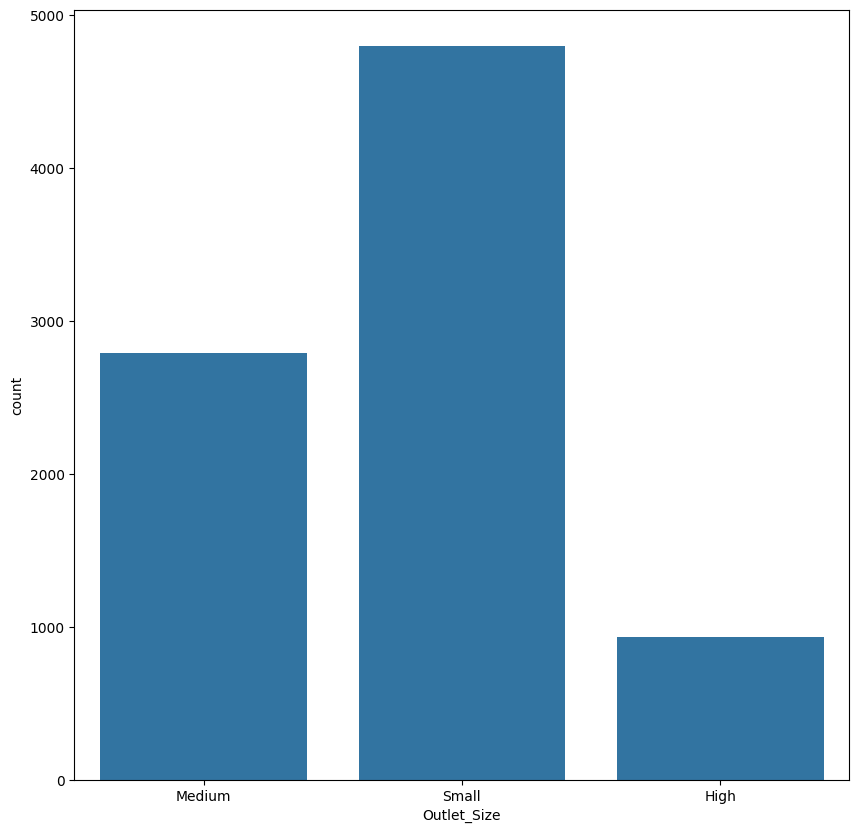

In [26]:
# count plot for outlet size
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Size',data=df)

It is visible that the small outlet size stores are much more in number.

<Axes: xlabel='Outlet_Type', ylabel='count'>

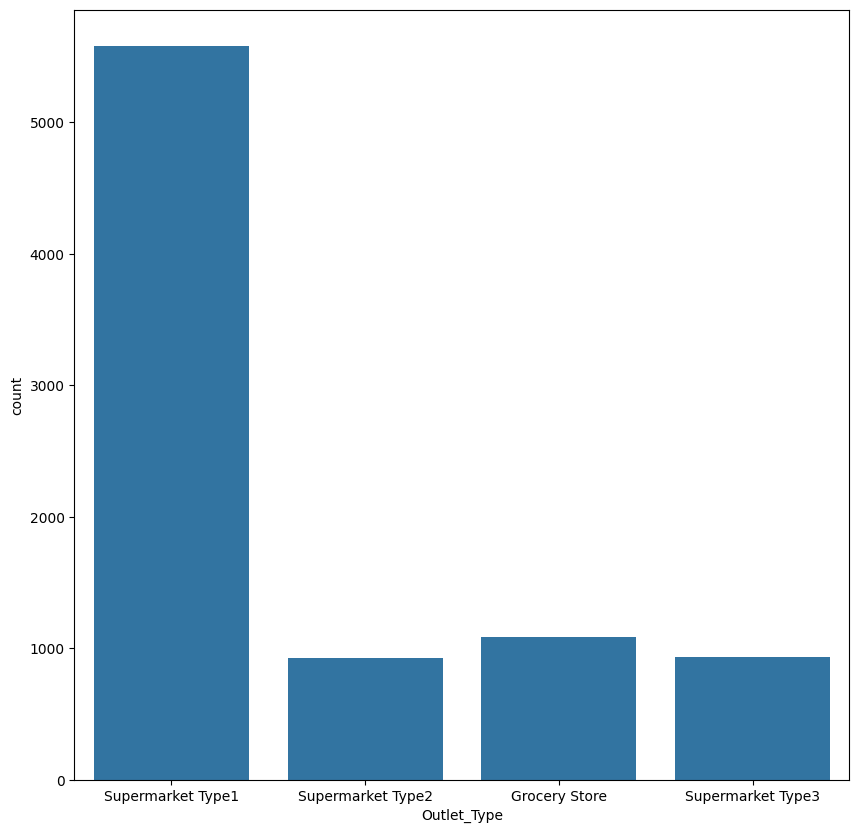

In [27]:
# count plot for outlet type
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Type',data=df)

Supermarket Type1 is the most frequent outlet type in the data.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

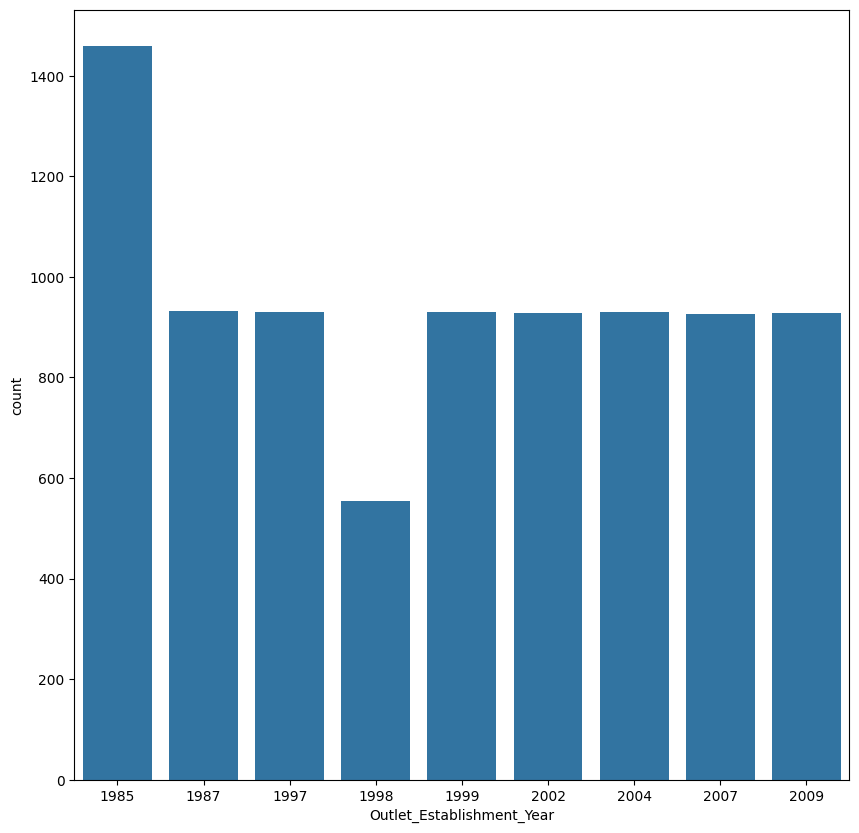

In [28]:
# countplot for outlet establishment year
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Establishment_Year',data=df)

Most stores were opened in the year 1985 and least in 1998.

<ipython-input-29-0d9e4564c877>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Item_Weight']),color='red')


<Axes: xlabel='Item_Weight', ylabel='Density'>

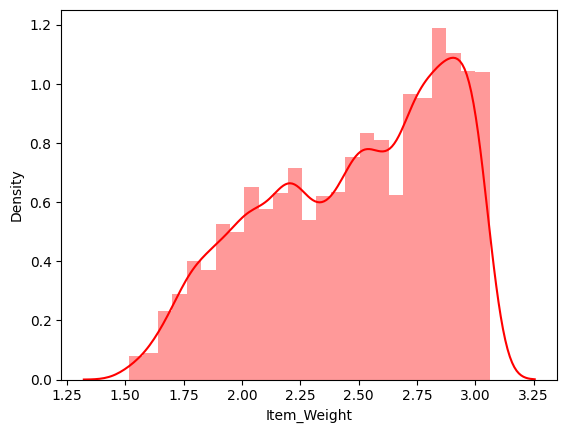

In [29]:
# Weight distribution plot
sns.distplot(np.log(df['Item_Weight']),color='red')

<ipython-input-30-0a788d73cade>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'],color='red')


<Axes: xlabel='Item_Visibility', ylabel='Density'>

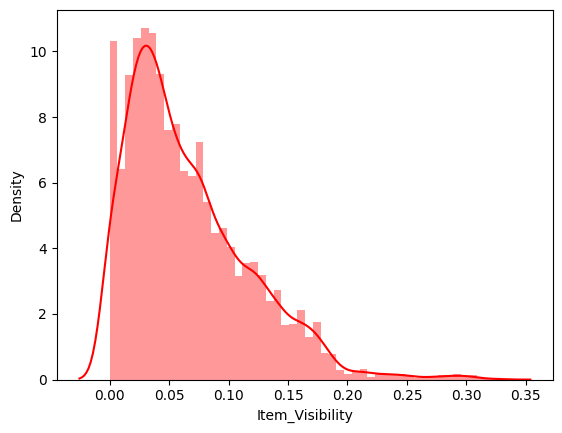

In [30]:
#Visibility
sns.distplot(df['Item_Visibility'],color='red')

<ipython-input-31-50358e381a9a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Item_MRP']),color='blue')


<Axes: xlabel='Item_MRP', ylabel='Density'>

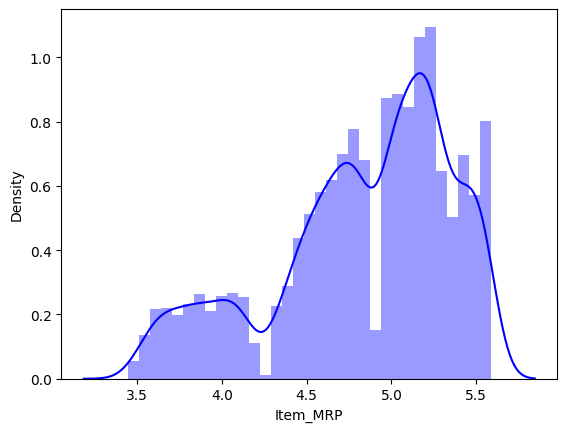

In [31]:
#MRP
sns.distplot(np.log(df['Item_MRP']),color='blue')

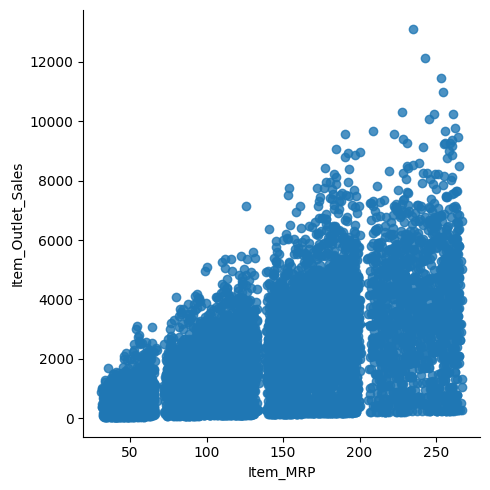

In [32]:
sns.lmplot(data=df, x="Item_MRP",y="Item_Outlet_Sales")

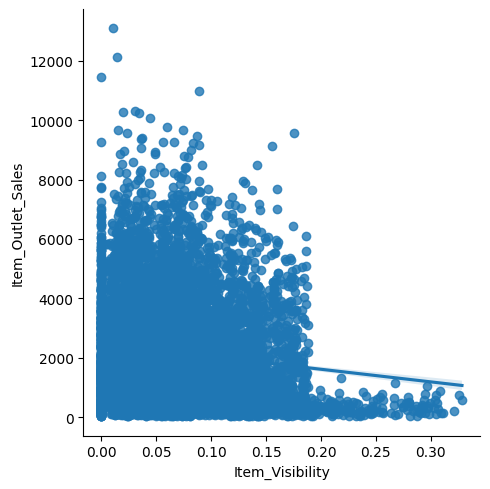

In [33]:
sns.lmplot(data=df,x="Item_Visibility",y="Item_Outlet_Sales")

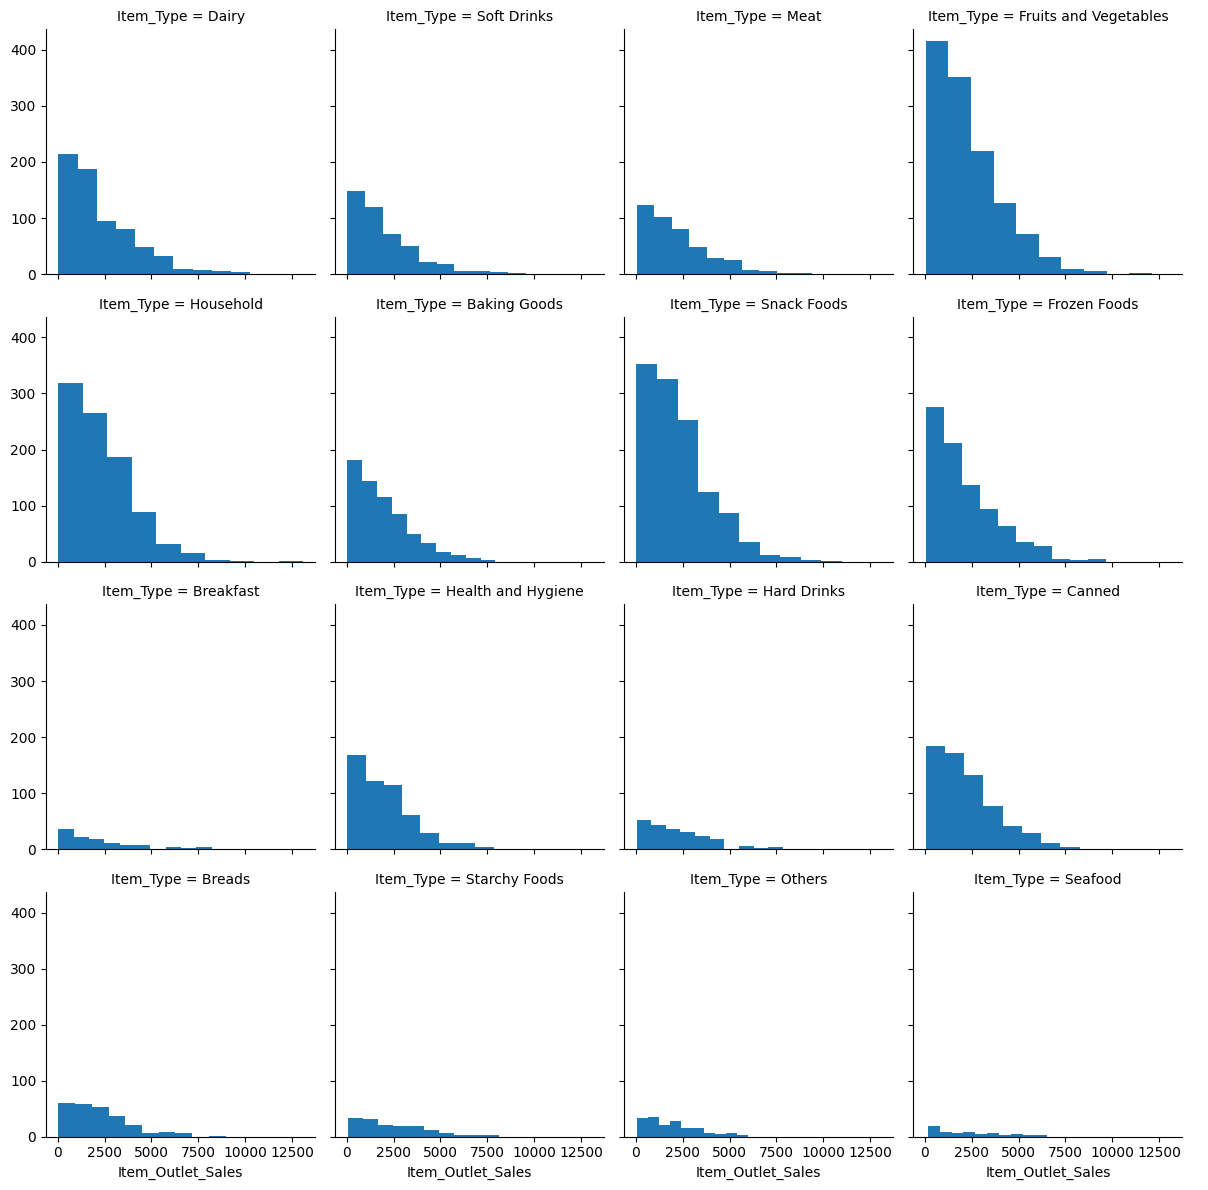

In [34]:
sns.FacetGrid(df, col='Item_Type',col_wrap=4)\
.map(plt.hist,'Item_Outlet_Sales')\
.add_legend();

### **Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.

Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.


$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.

Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.

To find correlation between variables from the soccer data we will use [pandas.dataframe.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method.

It computes pairwise correlation between two columns by excluding NA or NaN values if any. The default method used to calculate correlation coefficient is pearson correlation.

<Axes: >

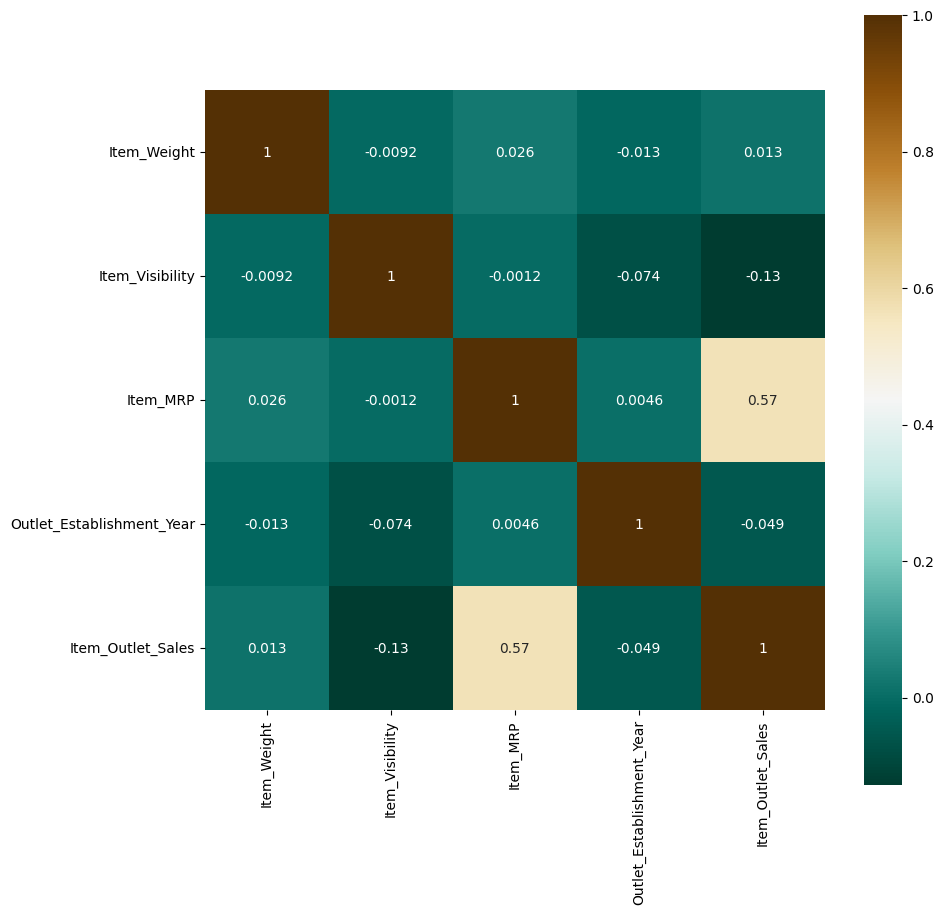

In [36]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,cmap='BrBG_r')

### **Categorical Correlation**
#### **Chi Squared Test**

A sample's distribution of a categorical variable must frequently be compared to the distribution of a categorical variable in another sample.

The chi squared test of independence, often known as the chi squared test of association, is used to detect whether or not categorical variables are related.

The data must meet the following requirements for this test:

* Categorical variables
* Sample size is relatively large
* Independent observations

The chi squared test is performed in the following steps:
* Find a "expected" number (E) for each observed number (0) in the table.

$$χ^2  = \frac{∑(O_i – E_i)^2}{E_i}$$

* A chi-square test will provide us with a p-value. The p-value indicates whether or not our test results are significant.

However, in order to do a chi-square test and calculate the p-value, we need two pieces of information:

* Degrees of freedom. That is simply the number of categories minus one.

* Significance Level. The standard alpha level is 0.05 (5%), but alternative values such as 0.01 or 0.10 are possible.

* The following are the different values of p that indicate different hypothesis interpretations:

* P = 0.05; Hypothesis is rejected
* P > 0.05; Acceptance of Hypothesis

Watch the videos, [Degrees of Freedom Part 1](https://www.projectpro.io/project/hackerday-project/project-title/piecewise%20spline%20regression%20project#sub-hackerday-video-18) and [Degrees of Freedom Part 2](https://www.projectpro.io/project/hackerday-project/project-title/piecewise%20spline%20regression%20project#sub-hackerday-video-19) to understand the basics of Degrees of Freedom and their interpretation.

In [37]:
# Outlet_size and outlet type
cross_tab=pd.crosstab(index=df['Outlet_Size'],columns=df['Outlet_Location_Type'])
print(cross_tab)

Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Size                                 
High                       0       0     932
Medium                   930       0    1860
Small                   1457    2785     555


In [38]:
# cross tab
cross_tab

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1860
Small,1457,2785,555


In [39]:
# chi2 contingency table
result = chi2_contingency(cross_tab)

In [40]:
# H0 is there is no significance
result

Chi2ContingencyResult(statistic=4804.376637943735, pvalue=0.0, dof=4, expected_freq=array([[ 261.14379622,  304.68599601,  366.17020777],
       [ 781.75020542,  912.0964902 , 1096.15330438],
       [1344.10599836, 1568.21751379, 1884.67648785]]))

In [41]:
print("The p value is",result[1])

The p value is 0.0


#### **Cramer's V Test**

Cramer's V is a method for assessing the strength of a relationship between two variables. Your variables of interest should be categorical, with two or more unique values per category, in order to use it.

When there is more than a 2 X 2 contingency, Cramer's V is employed to investigate the relationship between two category variables (e.g. 2 X 3).
Cramer's V denotes the relationship or correlation between two variables.

In [42]:
def cramers_v(var1,var2):
  cross_tab=np.array(pd.crosstab(var1,var2,rownames=None,colnames=None))
  stat=chi2_contingency(cross_tab)[0]
  obs=np.sum(cross_tab)
  var3=min(cross_tab.shape)-1
  return (stat/(obs*var3))

In [43]:
label=preprocessing.LabelEncoder()
data_encoded=pd.DataFrame()

In [44]:
for i in df[['Outlet_Type','Outlet_Size','Outlet_Location_Type']].columns:
  data_encoded[i]=label.fit_transform(data[i])

In [45]:
data_encoded

,Outlet_Type,Outlet_Size,Outlet_Location_Type
0,1,1,0
1,2,1,2
2,1,1,0
3,0,2,2
4,1,0,2
...,...,...,...
8518,1,0,2
8519,1,2,1
8520,1,2,1
8521,2,1,2


In [46]:
var4=[]

for var1 in data_encoded:
  col=[]
  for var2 in data_encoded:
    cramers=cramers_v(data_encoded[var1],data_encoded[var2])
    col.append(round(cramers,2))
  var4.append(col)

cramer_results=np.array(var4)

result_cv=pd.DataFrame(cramer_results,columns=data_encoded.columns,index=data_encoded.columns)

In [47]:
result_cv

,Outlet_Type,Outlet_Size,Outlet_Location_Type
Outlet_Type,1.00,0.32,0.28
Outlet_Size,0.32,1.00,0.28
Outlet_Location_Type,0.28,0.28,1.00


#### **One Way ANOVA**

ANOVA is an abbreviation for Analysis of Variances, which evaluates the differences between group means. It's a statistical hypothesis test that looks to see if the means of at least two populations differ. To run ANOVA, we require at least one continuous variable and one categorical variable that separates your data into comparison groups. The term "analysis of variances" refers to how the test uses variances to determine whether the means are different.


ANOVA compares the variance of group means to the variance of the groups. This procedure establishes if the groups are part of a bigger population or if they are separate populations with different means.

Despite the fact that it analyses variations, it tests means. One way ANOVA is the most basic sort of ANOVA. This method is a generalisation of t tests that can be used to compare more than two groups.

The null hypothesis is that all groups have same mean and the alternate hypothesis is that atleast one group has different mean.

Watch full explanation for [Introduction to ANOVA](https://www.projectpro.io/project/hackerday-project/project-title/polynomial%20regression%20model%20in%20python%20from%20scratch#sub-hackerday-video-18) here.

In [49]:
anova_prep_res=df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].apply(list)
print(anova_prep_res)

Outlet_Location_Type
Tier 1    [3735.138, 2097.27, 1516.0266, 2187.153, 1589....
Tier 2    [1076.5986, 4710.535, 2748.4224, 1587.2672, 83...
Tier 3    [443.4228, 732.38, 994.7052, 556.6088, 343.552...
Name: Item_Outlet_Sales, dtype: object


In [50]:
anovaresults=f_oneway(*anova_prep_res)

In [51]:
print("The p value is",anovaresults[1])

The p value is 7.025683417882415e-24


In [52]:
anovaresults

F_onewayResult(statistic=53.64761754128398, pvalue=7.025683417882415e-24)

## **Feature Engineering**

In [53]:
#Feature Engineering
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Outlet Age**

In [54]:
#### dropped 4 rows from data and saved it in df ####

df['Outlet_Age']=2022 - df['Outlet_Establishment_Year']
df = df.drop(columns=['Outlet_Establishment_Year'])

df.head()

<ipython-input-54-0809a96fdf1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Age']=2022 - df['Outlet_Establishment_Year']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [55]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

*Label Encoding**

In [58]:
# Encoding

le=LabelEncoder()

col_encode=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in col_encode:
  df[i]=le.fit_transform(df[i])

df_new=df.drop(columns=['Item_Identifier'])
df_new=pd.get_dummies(df_new)
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,23,...,False,False,False,False,False,False,False,False,False,False
1,5.92,1,0.019278,48.2692,3,1,2,2,443.4228,13,...,False,False,False,False,False,False,False,False,True,False
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,23,...,False,False,False,False,True,False,False,False,False,False
3,19.20,1,0.000000,182.0950,0,2,2,0,732.3800,24,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,35,...,False,False,False,True,False,False,False,False,False,False


## **Split data**


In [59]:
from sklearn.model_selection import train_test_split
X=df_new.drop(columns=['Item_Outlet_Sales'])
y=df_new['Item_Outlet_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22222)

## **Modelling**

### **Multiple Linear Regression**


Linear regression, often known as simple regression, creates a relationship between two variables. Linear regression is represented visually as a straight line, with the slope determining how a change in one variable affects a change in the other. A linear regression relationship's y-intercept reflects one variable's value when the other's value is 0.

Multiple linear regression estimates the relationship between two or more independent variables and one dependent variable.
$$\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$$

where $p$ is... number of features in the model.

* For any given independent variable (x) value, y is the dependent variable's predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y, when x is 0.
* $\beta_1$ is the regression coefficient of variable $x_1$, which tells us how much y will change as $x_1$ increases or decreases.
* $\beta_p$is the regression coefficient of the last variable $x_p$, which tells us how much y will change as $x_p$ increases or decreases.
* $x_1$ ... $x_p$ are the independent or predictor variables that help us predict y
* $\epsilon$ is the error left due to the incorrect calculation of the regression coefficients.


For more information, refer to the [Linear Regression Model Project in Python for Beginners Part 1 Notebook](https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/regression_part_1.ipynb) where Simple Linear Regression and the mathematics behind it have been explained in detail.


### **Errors in Regression**

The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.

Let's understand the various errors in Regression:


* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.

$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$


* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.

$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$


* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.

$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

### **Model Comparisons**

* $R^2$: The $R^2$ or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s). $R^2$ is expressed between 0 and 1 for the level of variance explained.
As we learned in the previous section, the ratio $\frac{SSE}{TSS}$ should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
Mathematically, $R^2$ or explained variance can be expressed as:

$$ R^2 = 1 - \frac{SSE}{TSS} $$

* Adjusted $R^2$: For linear models, adjusted $R^2$ is a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input or inputs.
$R^2$ tends to overestimate the goodness-of-fit of the linear regression. It always grows as the number of independent variables in the model grows.
It happens because we tend to deduct a large amount (due to multiple variables) to calculate error as the number of independent variables increases. Hence, the ratio $\frac{SSE}{TSS}$ is even lower than it should be and  $R^2$ seems to be high but it might not be an appropriate model for production data. It is adjusted to account for this overestimation. Considering N as the total sample size and p as the number of independent variables, adjusted $R^2$ can be expressed as:

$$ \text{Adjusted }  R^2 = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1} $$

### **Regularization**

Before moving further ahead in the topic of Regularization, let us understand Underfitting and Overfitting properly.

* **Underfitting**: Underfitting occurs when a statistical model or machine learning algorithm fails to capture the underlying trend of the data, i.e., it performs well on training data but poorly on testing data. Its occurrence merely indicates that our model or method does not adequately suit the data. It frequently occurs when we select a simpler model yet the data contains complicated non-linear patterns or when there is insufficient data to develop a linear model. The obvious approach is to build a complex model or increase the number of linear features in the data.

* **Overfitting**: When a statistical model fails to produce correct predictions on testing data, it is said to be overfitted. When a model is trained with a large amount of data, it begins to learn from the noise and incorrect data entries in our data set. It usually occurs when we build a complex model on a simpler dataset.
An overfitted model performs well on training data because it has memorized the patterns in the data, but it performs poorly on testing data. An under-fitted model, on the other hand, will perform worse on both datasets because it is unable to capture the trends and patterns underlying the dataset when training.

**Regularization**

Avoiding overfitting is one of the most important tasks of training your machine learning model. If the model is overfitting, it will not be able to generalise and have a low accuracy in real time scenario. This occurs when your model is trying to grab too much information including the noise from your training dataset. By noise, we mean data points that aren't truly representative of your data's true properties, but are instead random chance. Learning such data points makes your model more adaptable, but it also increases the risk of overfitting. Regularization is a type of regression in which the coefficient estimates are constrained, regularised, or shrunk towards zero. In other words, in order to avoid overfitting, it pushes the model to be more simpler by reducing or shrinking the weights.


**Difference between L1 and L2 Regularization**

**Ridge or L2 Regularization**

In simple linear regression, an optimization function or loss function known as the residual sum of squares is used to create a model that accurately predicts the value of Y. (RSS). With the help of this loss function, the model learns. The difference between the actual value and the expected output is measured using the loss function. The coefficients are chosen that minimise the loss function when applied to the training data. The RSS is changed by adding the shrinkage quantity or a penality factor to the ridge regression. The penalty term in L2 regularisation is equal to the square of the coefficient magnitude so that a greater term is subtracted while updating to new coefficient value using optimization algorithm and a smaller value is achieved.

$$RSSnew = RSS + λ Σ(coeff^2)$$

Here, lambda is the tuning parameter that decides how much we want to penalize the model. As the lambda increases, the values of the parameters approaches zero.

**Lasso or L1 Regularization**

On the other hand, L1 regularisation, also known as Lasso Regression, alters the RSS by adding a penalty equal to the absolute value of the weight coefficients.

$$RSS new = RSS + λ Σ(|coeff|)$$


### **Elastic Net Regularization**

Elastic Net was born out of a critique of lasso, whose variable selection can be overly dependent on data and thus unstable. To achieve the best of both worlds, mix the penalties of ridge regression and lasso.

$$RSSnew = RSS + λ_1 Σ(coeff^2) + λ_2 Σ(|coeff|)$$


### **Random Forest Regressor**

Before moving on to Random Forest Regressor let's understand Decision Trees.

**Decision Tree**

Decision trees, often known as CART or Classification and Regression Trees, are versatile supervised machine learning algorithms capable of performing both regression and classification problems. and can also be used for operations with multiple classes as well. The name implies that it uses a tree-like flowchart to display the predictions that come from a sequence of feature-based splits. It begins with a root node and finishes with a leaf decision. It can be used to portray decisions and decision-making in a visual and explicit manner. The root of a decision tree is at the top, and this root is split into multiple nodes.

In layman's terms, decision trees are nothing more than a series of if-else statements. It determines whether the condition is true, and if so, it proceeds to the next node related with that choice.

**Decision Tree and Overfitting**

Choosing which features to use and what conditions to use for splitting, as well as understanding of when to stop, are all part of the process of growing a tree. All of the features are taken into account, and several split points are tested using a cost function and many of the branches may also reflect noise or outliers in the training data. The split with the lowest entropy is chosen. This is an example of recursive algorithm because the groups generated can be subdivided using the same approach and is also known as the greedy algorithm because it will exhaust all the features and conditions in order to reach the lowest cost, even if the algorithm ends up overfitting the dataset. In a decision tree, overfitting occurs when the tree is designed so as to perfectly fit all samples in the training dataset.

The cost function or in this case Information Gain finds the feature to split so that the most homogeneous branches can be created. As a result, you can map the choice of a particular homogeneous class at the end to all features involved since the top, and the tree will link that homogenous class to those set of features. As a dataset usually has a number of features, it results in large number of splits, which in turn gives a huge tree. Such trees are complex and can lead to overfitting because the tree will learn each feature value for a particular observation as the tree grows till it's maximum depth and when a new observation is tested it will generate large errors. Hence, decision trees are particularly really prone to overfitting.


**Bagging and Boosting**
Now let us understand Ensembling particularly, Bagging and Boosting. Bagging and Boosting are types of ensemble learning techniques where that decrease the variance of a single estimator by combing the power of multiple learners. The significant difference is that bagging involves averaging numerous learners' results and boosting covers sequentially, building strong learners by penalizing errors for weak early learners. Watch the reference video below to know more.


**Random Forest Algorithm**

Random forest is a supervised learning algorithm. It creates a "forest" out of an ensemble or aggregation of decision trees, which are often trained using the "bagging" or "bootstrap aggregating" method. The bagging method's basic idea is that combining different learning models improves the overall result. Simply said, random forest combines many decision trees to produce a more accurate and stable prediction. It predicts by averaging in the case of regression and taking majority in the case of classification, the results of various trees. The precision of the result improves as the number of trees grows. Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier, the number of trees to be grown can be specified as a parameter.

A random forest method overcomes the drawbacks of a decision tree algorithm. Overfitting is a problem with decision trees, especially when they are quite deep. When the tree is created to perfectly fit all samples in the training data set, it takes into account a lot of specificity while leading to homogeneous groups. As a result, it produces branches that follow strict sparse data restrictions and cannot generalise to unknown data. It will attempt to apply the rigorous rules generated by taking into account the noise in the data to fresh data, but it will perform worse on new data.

**Randomness in Random Forest**

Random forest increases the model's randomness while generating the trees. When splitting a node, it looks for the best feature from a random subset of features rather than the most important feature of the overall dataset. As a result, there is a lot of diversity, which leads to a better model. Combining the results of so many random trees reduces overfitting and boosts precision because the best results of trees produced by random features are incorporated into the final result.

### **Extra Trees Regressor**

Extra Trees is a machine learning ensemble approach that aggregates predictions from many decision trees.

It's related to the popular random forest algorithm. Although it uses a simpler approach to create the decision trees used as members of the ensemble, it can often achieve comparable or greater performance than the random forest algorithm.

Extra Trees generates a huge number of unpruned decision trees from the training dataset. In the case of regression, predictions are formed by averaging the forecast of the decision trees, and in the case of classification, predictions are made by employing majority voting.

* Regression: Forecasts made by averaging decision tree predictions.
* Predictions made by majority vote from decision trees are classified.

Unlike bagging and random forest, which generate each decision tree from a bootstrap sample of the training dataset, the Extra Trees algorithm generates each decision tree using the entire training dataset.

The Extra Trees algorithm, like random forest, will randomly sample the characteristics at each split point of a decision tree. The Extra Trees algorithm chooses a split point at random, as opposed to random forest, which utilises a greedy algorithm to choose an ideal split point.

### **Gradient Boosting Regressor**

**Boosting**

The term 'boosting' refers to a set of algorithms that help weak learners become strong.
Boosting algorithms, unlike many machine learning models, aim to improve prediction ability by training a series of weak models, each one correcting for the faults of its predecessors. It's done by stringing together weak models to create a model. To begin, a model is created using the training data. The second model is then created, which attempts to correct the faults in the previous model. This approach is repeated until either the entire training data set is properly predicted or the maximum number of models specified has been created.

It's important to remember that boosting is a generic method, not a specific model, in order to comprehend it. Boosting involves specifying a weak model, such as regression or decision trees, and then improving it. In Ensemble Learning, the primary difference between Bagging and Boosting is that in bagging, weak learners are trained in simultaneously, but in boosting, they are trained sequentially. This means that each new model iteration increases the weights of the prior model's misclassified data. This redistribution of weights aids the algorithm in determining which parameters it should focus on in order to increase its performance.

Both the Ensemble techniques are used in a different way as well.  Bagging methods, for example, are often used on poor learners who have large variance and low bias such as decision trees because they tend to overfit, whereas boosting methods are employed when there is low variance and high bias. While bagging can help prevent overfitting, boosting methods are more vulnerable to it because of a simple fact they continue to build on weak learners and continue to minimise error. This can lead to overfitting on the training data but specifying a decent number of models to be generated or hyperparameter tuning,  regularization can help in this case, if overfitting encountered.


**Gradient Boosting**

The primary idea behind this technique is to develop models in a sequential manner, with each model attempting to reduce the mistakes of the previous model.The additive model, loss function, and a weak learner are the three fundamental components of Gradient Boosting.

The method provides a direct interpretation of boosting in terms of numerical optimization of the loss function using Gradient Descent. We employ Gradient Boosting Regressor when the target column is continuous, and Gradient Boosting Classifier when the task is a classification problem. The "Loss function" is the only difference between the two. The goal is to use gradient descent to reduce this loss function by adding weak learners. Because it is based on loss functions, for regression problems, Mean squared error (MSE) will be used, and  for classification problems, log-likelihood.


## **MLP Regressor**

MLP (multi-layer perceptrons) are artificial neural networks with three or more layers of perceptrons. These layers are as follows: a single input layer, one or more hidden layers, and a single perceptron output layer. The data flows in a single direction, forward, from the input layers to the hidden layer(s) and then to the output layer. Backpropagation is a process in which the multi-layer perceptron receives feedback on the error in its predictions and adjusts its weights to make more accurate predictions in the future. Many machine learning algorithms, such as classification and regression, make use of MLP. They have been demonstrated to produce very accurate results, particularly for classification problems.

The MLPRegressor class implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which may alternatively be thought of as employing the identity function as an activation function. As a result, the square error is used as the loss function, and the output is a set of continuous numbers.

In [60]:
# names of models
models=[ ('lr',LinearRegression()),('ElasticNet',ElasticNet()),('RF',RandomForestRegressor()),
         ('ETR',ExtraTreesRegressor()),('GBM',GradientBoostingRegressor()),('MLP',MLPRegressor())

]

In [61]:
def model_selection_function(x,y,cross_folds,model):
  scores=[]
  names=[]
  for i, j in model:
    cv_scores=cross_val_score(j,x,y,cv=cross_folds,n_jobs=-1)
    scores.append(cv_scores)
    names.append(i)
  for k in range(len(scores)):
    print(names[k],scores[k].mean())
  return

In [62]:
model_selection_function(X_train,y_train,3,models)

lr 0.4958178267370768
ElasticNet 0.47308329416120437
RF 0.5523100110162729
ETR 0.5002738458108548
GBM 0.5906345954416229
MLP 0.4680942265733357


In [63]:
model_selection_function(X_train,y_train,5,models)

lr 0.4964782457688462
ElasticNet 0.47339485984955526
RF 0.5542204107750688
ETR 0.5041971041094306
GBM 0.5910907303373242
MLP 0.5000981186755972


### **Spline Regression**

Polynomial regression is a sort of regression approach that employs a nonlinear function.

Polynomial regression adds more predictors to the linear model by raising each of the previous predictors to a power. This method is a quick and easy way to offer a non-linear fit to data.

To extend linear regression to a non-linear relationship between the dependent and independent variables, the conventional strategy has been to substitute the linear model with a polynomial function.


Unfortunately, polynomial regression has its own set of problems. As the formula's complexity develops, so does the number of characteristics, which might be challenging to manage at times. Furthermore, even on this small one-dimensional data set, polynomial regression has a tendency to over-fit.

There are other problems with polynomial regression. It is, for example, intrinsically non-local, which means that changing the value of Y at one location in the training set can affect the fit of the polynomial to data points that are very far away. As a result, instead of using a high degree polynomial on the entire dataset, we can replace it with a variety of lower degree polynomial functions.

To avoid the drawbacks of polynomial regression, we can employ an enhanced regression technique that, rather than creating a single model for the entire dataset, separates it into numerous bins and fits each bin with a distinct model. Regression spline is a strategy for doing so.

### **Generalized Additive Models**

GAMs (Generalised Additive Models) are an adaptation that allows us to model non-linear data while keeping it explainable. A GAM is a linear model that differs from Generalised Linear Models such as Linear Regression. Non-linear features can be learned by a GAM. GAMs disregard the requirement that the relationship be a simple weighted sum and instead assume that the outcome can be represented by a sum of arbitrary functions of each feature.

It is quite similar to the regression model formula, however instead of using BiXi (simple weighted sum), it utilises f1(X1) (flexible function). It is still, at its foundation, the sum of feature effects. Instead of modelling all relationships, we can select particular features to model relationships because they also support the linear effect.

Splines are learning functions that can be used to learn any function. The feature functions are constructed using penalised B splines, which allow us to automatically model non-linear connections without having to manually experiment with numerous transformations on each variable. GAMs are generalised linear models that allow non-linear features functions while retaining additivity. Because the model is additive, it is simple to investigate the effect of each X i on Y while maintaining all other predictors constant.


In [89]:
!pip install pygam --quiet

In [93]:
import numpy as np
from pygam import PoissonGAM

# Ensure X_train and y_train are numeric (if using NumPy arrays)
X_train = X_train.astype(float)  # Convert all features to float (numeric)
y_train = y_train.astype(int)  # Convert target variable to integer (0 or 1)

# Replace NaNs and infinite values
X_train = np.nan_to_num(X_train, nan=np.nan)  # Replace NaN with NaN (or any value like 0)
X_train = X_train[~np.isnan(X_train).any(axis=1)]  # Remove rows with NaN values
y_train = np.nan_to_num(y_train, nan=np.nan)  # Replace NaN in y_train
y_train = y_train[~np.isnan(y_train)]  # Remove NaN values from y_train

# Perform grid search
gam = PoissonGAM().gridsearch(X_train, y_train)
gam.summary()

  9% (1 of 11) |##                       | Elapsed Time: 0:02:27 ETA:   0:24:38

did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:04:36 ETA:   0:20:42

did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:08:17 ETA:   0:14:31

did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:10:27 ETA:   0:12:32

did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:12:34 ETA:   0:10:28

did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:14:41 ETA:   0:08:23

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:16:49 ETA:   0:06:18

did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:18:55 ETA:   0:04:12

did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:21:02 ETA:   0:02:06

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:23:09 Time:  0:23:09


did not converge
PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                      82.995
Link Function:                          LogLink Log Likelihood:                              -1437737.6718
Number of Samples:                         6815 AIC:                                          2875641.3336
                                                AICc:                                         2875643.4552
                                                UBRE:                                             414.8354
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6814
Feature Function    

<ipython-input-93-29208cc5170c>:16: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### **Model Ensembling Starts Here**

### **Voting Regressor**

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [94]:
#Creates averages of model predictions

from sklearn.ensemble import VotingRegressor

reg1=LinearRegression()
reg2=GradientBoostingRegressor()
reg3=MLPRegressor()

voting_regress=VotingRegressor(estimators=[('LR',reg1),('GBM',reg2),('MLP',reg3)])

scores=cross_val_score(voting_regress,X_train,y_train,cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [95]:
print(scores)
print(scores.mean())

[0.56315947 0.525385   0.56488745]
0.5511439735963013


### **Model Stacking**



Stacking, also known as Stacked Generalization, is a machine learning ensemble algorithm.

It use a meta-learning algorithm to find the optimum way to combine predictions from two or more base machine learning methods.

The advantage of stacking is that it can combine the capabilities of several high-performing models on a classification or regression job to create predictions that outperform any single model in the ensemble.

Unlike bagging, the models in stacking are often distinct (e.g., not all decision trees) and fit to the same dataset (e.g. instead of samples of the training dataset).
In contrast to boosting, a single model is utilised in stacking to learn how to optimally combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).
A stacking model's architecture consists of two or more base models, also known as level-0 models, and a meta-model that aggregates the predictions of the base models, known as a level-1 model.

* Level-0 Models (Base-Models): These are models that are fitted to the training data and whose predictions are compiled.
* Level-1 Model (Meta-Model): Learns the optimum way to combine the predictions of the base models.
The meta-model is trained using out-of-sample data predictions given by base models.

In the case of regression, the outputs of the base models used as input to the meta-model can be real values, probability values, probability like values, or class labels.

The most popular method for producing the training dataset for the meta-model is k-fold cross-validation of the base models, with the out-of-fold predictions serving as the foundation for the meta-model training dataset.

In [96]:
reg1=LinearRegression()
reg2=GradientBoostingRegressor()
estimators=[('LR',reg1),('GBM',reg2)]

In [97]:
from sklearn.ensemble import StackingRegressor
level_1_estimator= MLPRegressor()
stacking_model= StackingRegressor(estimators=estimators,final_estimator=level_1_estimator)

In [98]:
scores=cross_val_score(stacking_model,X_train,y_train,cv=3)

In [99]:
scores

array([0.60733044, 0.56735862, 0.60023407])

### **Model Blending**

Blending is an ensemble machine learning technique that employs a machine learning model to learn how to effectively integrate predictions from different ensemble member models. Blending is an extension of Stacking Generalization. The sole distinction is that in Blending, the k-fold cross validation procedure is not used to construct the meta-training model's data. Blending uses a "one-holdout set," or a small subset of the training data (validation) to make predictions that will be "stacked" to form the meta-training model's data. Predictions are also built from the test data to create the meta-model test data.

In [101]:
from numpy import hstack
X_train_1,X_val,y_train_1,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=2222)

def list_models():
  models=[]
  models.append(('LR',LinearRegression()))
  models.append(('GBR',GradientBoostingRegressor()))
  return models

def fit_all_models(models,X_train,X_val,y_train,y_val):
  level_1_feat=[]
  for name,model in models:
    model.fit(X_train,y_train)
    y_hat=model.predict(X_val)
    y_hat=y_hat.reshape(len(y_hat),1)
    level_1_feat.append(y_hat)

  level_1_feat=hstack(level_1_feat)

  level_1_estimator= MLPRegressor()

  level_1_estimator.fit(level_1_feat,y_val)

  return level_1_estimator

def pred_data(models,blends,X_test):
  meta_model_X=[]
  for name,model in models:
    yhat=model.predict(X_test)
    yhat=yhat.reshape(len(yhat),1)
    meta_model_X.append(yhat)
  meta_model_X=hstack(meta_model_X)
  return blends.predict(meta_model_X)

models=list_models()
model_blender=fit_all_models(models,X_train_1,X_val,y_train_1,y_val)

y_hat=pred_data(models,model_blender,X_train)

## **Model Evaluation**

In [102]:
from sklearn.metrics import r2_score

r2_score(y_train,y_hat)

0.629881820519923

In [103]:
scores=cross_val_score(model_blender,X_train,y_train,cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
scores

array([0.4779899 , 0.45796232, 0.490909  ])

In [105]:
y_pred=pred_data(models,model_blender,X_test)
print("R2 of Blending is")
print(r2_score(y_test,y_pred))


#stacking_model
model_stack=stacking_model.fit(X_train,y_train)
y_pred=model_stack.predict(X_test)
print("R2 of Stacking is")
print(r2_score(y_test,y_pred))

#GBM
model_gbm=GradientBoostingRegressor()
model_gbm.fit(X_train,y_train)
y_pred=model_gbm.predict(X_test)
print("R2 of GBM is")
print(r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


R2 of Blending is
0.6081999454818163


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


R2 of Stacking is
0.6104372081695292
R2 of GBM is
0.6094170457471549


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [109]:
from pygam import PoissonGAM
from sklearn.metrics import r2_score

# If X_train and y_train are already NumPy arrays, no need for .values
gam = PoissonGAM(n_splines=5).gridsearch(X_train, y_train)

# Make predictions on the test set
y_pred = gam.predict(X_test)

# Evaluate the model using R² score (if appropriate for your data)
print("R² score:", r2_score(y_test, y_pred))

  9% (1 of 11) |##                       | Elapsed Time: 0:00:20 ETA:   0:03:26

did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:00:41 ETA:   0:03:05

did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:01:03 ETA:   0:02:49

did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:01:23 ETA:   0:02:26

did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:01:44 ETA:   0:02:05

did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:02:07 ETA:   0:01:46

did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:02:27 ETA:   0:01:24

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:02:47 ETA:   0:01:02

did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:03:11 ETA:   0:00:42

did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:03:31 ETA:   0:00:21

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:03:51 Time:  0:03:51


did not converge
R² score: 0.6119774835901193


In [110]:
model_gbm=GradientBoostingRegressor()
scores=cross_val_score(model_gbm,X,y,cv=5)

In [111]:
scores.mean()

0.5939061338841453

In [112]:
scores=cross_val_score(stacking_model,X,y,cv=3)
scores.mean

<function ndarray.mean>